In [2]:
import numpy as np #Imorting needed libaries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #importing linear regression library for the plot  
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display


df = pd.read_csv("data_3dprinter.csv") #importing the dataset 
df.rename(columns={"tension_strenght": "tensile_strength"}, inplace=True) #renaming the column 

if 'infill_pattern' in df.columns:  #encoding the data 
    df['infill_pattern_encoded'] = df['infill_pattern'].map({'grid': 0, 'honeycomb': 1})
if 'material' in df.columns:
    df['material_encoded'] = df['material'].map({'abs': 0, 'pla': 1})

df.drop(columns=['material', 'infill_pattern'], inplace=True) #dropping the columns that are not encoded 

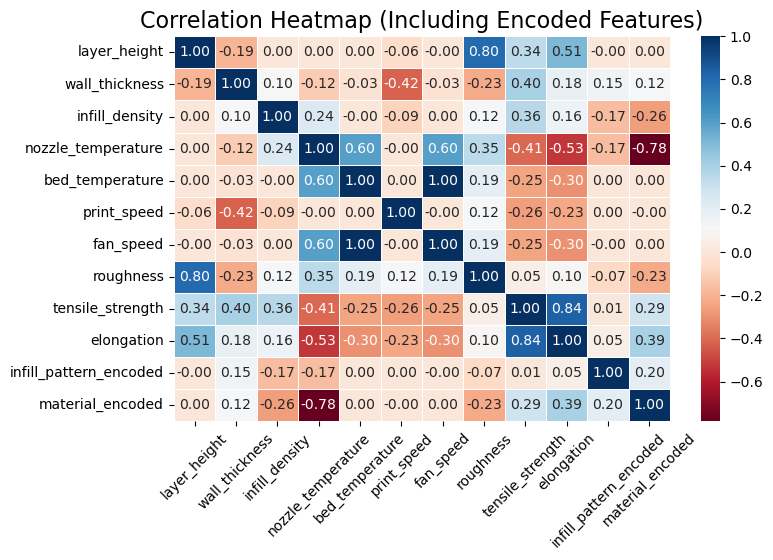

In [5]:
corr_matrix = df.corr(numeric_only=True)#Creating the matrix of correlation between all the features and labels
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu", linewidths=0.5)#plotting the heatmap 
plt.title("Correlation Heatmap (Including Encoded Features)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Best Regression and Tree models 

In [15]:

max_values = {
    "Roughness": df["roughness"].max(),
    "Tensile Strength": df["tensile_strength"].max(), 
    "Elongation": df["elongation"].max()}


mae_data = {    #creating the comparison table
    "Target": ["Roughness", "Tensile Strength", "Elongation"],
    "Best Regression Model": ["2nd Deg. 4 Features (Implemented)", "2nd Deg. 5Features", "2nd Deg. 6Features"],
    "Train R²": [0.86, 0.88, 0.77],
    "Test R²": [0.85, 0.85, 0.75],
    "Train MAE": [29.82, 2.8, 0.14],
    "Test MAE": [28.48, 2.29, 0.14]}

mae_df = pd.DataFrame(mae_data)

#finding MAE as a percentage of the maximum value of the target for better standarisation 
mae_df["Train MAE (%)"] = [ (mae_df.loc[i, "Train MAE"] / max_values[mae_df.loc[i, "Target"]]) * 100 for i in mae_df.index]
mae_df["Test MAE (%)"] = [(mae_df.loc[i, "Test MAE"] / max_values[mae_df.loc[i, "Target"]]) * 100 for i in mae_df.index]

display(mae_df)


max_values_tree = {
    "Roughness": df["roughness"].max(),
    "Tensile Strength": df["tensile_strength"].max(),  # note the misspelling
    "Elongation": df["elongation"].max()}


mae_data_tree = {    #creating the comparison table
    "Target": ["Roughness", "Tensile Strength", "Elongation"],
    "Best Tree Model Depth": ["4", "4", "3"],
    "Train R²": [0.96, 0.92, 0.89],
    "Test R²": [0.93, 0.95, 0.90],
    "Train MAE": [12.82, 1.62, 0.20],
    "Test MAE": [25.21, 1.67, 0.21]}

mae_df_tree = pd.DataFrame(mae_data_tree)

#finding MAE as a percentage of the maximum value of the target for better standarisation 
mae_df_tree["Train MAE (%)"] = [ (mae_df_tree.loc[i, "Train MAE"] / max_values_tree[mae_df_tree.loc[i, "Target"]]) * 100 for i in mae_df_tree.index]
mae_df_tree["Test MAE (%)"] = [(mae_df_tree.loc[i, "Test MAE"] / max_values_tree[mae_df_tree.loc[i, "Target"]]) * 100 for i in mae_df_tree.index]

display(mae_df_tree)


max_values_nn = {"Elongation": df["elongation"].max()}

mae_data_nn = {    #creating the comparison table
    "Target": ["Elongation"],
    "Best NN Model": [ "2 layers (4,8)"],
    "Train R²": [0.83],
    "Test R²": [0.82],
    "Train MAE": [0.1],
    "Test MAE": [0.15]}

mae_df_nn = pd.DataFrame(mae_data_nn)


mae_df_nn["Train MAE (%)"] = [(mae_df_nn.loc[i, "Train MAE"] / max_values_nn[mae_df_nn.loc[i, "Target"]]) * 100 for i in mae_df_nn.index]
mae_df_nn["Test MAE (%)"] = [(mae_df_nn.loc[i, "Test MAE"] / max_values_nn[mae_df_nn.loc[i, "Target"]]) * 100 for i in mae_df_nn.index]

display(mae_df_nn)

Target              Best Regression Model  Train R²  Test R²  \
0         Roughness  2nd Deg. 4 Features (Implemented)      0.86     0.85   
1  Tensile Strength                 2nd Deg. 5Features      0.88     0.85   
2        Elongation                 2nd Deg. 6Features      0.77     0.75   

   Train MAE  Test MAE  Train MAE (%)  Test MAE (%)  
0      29.82     28.48       8.103261      7.739130  
1       2.80      2.29       7.567568      6.189189  
2       0.14      0.14       4.242424      4.242424

Target Best Tree Model Depth  Train R²  Test R²  Train MAE  \
0         Roughness                     4      0.96     0.93      12.82   
1  Tensile Strength                     4      0.92     0.95       1.62   
2        Elongation                     3      0.89     0.90       0.20   

   Test MAE  Train MAE (%)  Test MAE (%)  
0     25.21       3.483696      6.850543  
1      1.67       4.378378      4.513514  
2      0.21       6.060606      6.363636

Target   Best NN Model  Train R²  Test R²  Train MAE  Test MAE  \
0  Elongation  2 layers (4,8)      0.83     0.82        0.1      0.15   

   Train MAE (%)  Test MAE (%)  
0       3.030303      4.545455

The above table summarises the best Regression and Tree models selectrd to represent all the targets and its correlation. The best model for each of the targets is classified as below: 

The best model is that can show high correlation of R^2 values (correlation between predicted results by the model and the actual results of the model) for both testing and training sets. An the model that shows smaller error evaluation parameters, such as MAE,also for both taining and testing sets. It is important that the correlation and error evaluation values are similair for both of the datasets (training and testing) as i is an incdication that the model is a good fit for the target. This imlies that the model is robust and can be used for the dat prediction with high accuracy. 

--------------------------------------------------------------------------
--Regression Models--

From the table it can be said that the data is best represented with 2nd degree polynomial regression models with varying number of feartures, as it is a better choice to capture all the complexity of the data without overfitting it. 

* Roughness Modelling
The model shows high strong correlation for both of the sets and a small MAE value, and its varience suggesting that the model is a good fit and perfoming well. The model takes 4 features with the highest correlation. The correlation is high as the features included have varying range correlation with the target roughness, and are likely less noisy. 

* Tensile Strength Modelling
The model shows the same low MAE for both of the training and testing sets, also showing higherst correlation across all the targets. Uses 5 feature of the strongest correlation. The elongation has a very strong correlation with tensile strength, however it was not used in the modelling, as elongation is another target. As, it is an input and not an output. 

* Elongation Modelling
The model shows slightly lower Correlation for the predicitions, but this is expected as the data is has a few features with the same correlation coefficients (see above heatmap). However the MAE values are very small indicating the precision of the model. 

---------------------------------------------------------------------------------------
--Tree Models-- 

-From the table above it is seen that the best tree representation for the data targets is decision tree to 3d and 4th depth, as it is the best choice to model data and its complexity. It allows to maximise the predictive power and minimise the error evaluations of the models. Tree models overall showed better perfomance than regression models, the significant improve is due to the ability of the tree models to handle non linear interactions, as the split is done to maximise perfomance and dont assume any mathematical models. Decision Tree models are also not as sensitive to the scailing as regression models, although regression models were scailed when it was needed for the improved perfomance. 

* Roughness Modelling
The tree model significantly improved the perfomance of both Training and Testing sets in correlation coefficients and MAE compring to the roughness model. This is likely due to non linearities in the data of many features such as infill pattern. Tree is the best model to predict Roughness.

* Tensile Strength Modelling
Tree model is more accurate, this could be due the complexity of the data, as regression model required 5 fetures for the best perfomance, decision tree captured data more effectively by hierarchical splits. Tree is the best model to predict Tensile Strength. 

* Elongation Modelling
Similarly to above models, elongation decision tree showed stronger R^2 correlations than the regression models, however, the MAE evaluation error was higher for the tree model comparing to the best regression model. This could be a sign of a slight overfit of a tree model, but also it could imply that elongation has smoother relationship. For elongation the best model woud depend on what is more important either the smaller error percentage (Regrssion) or the better overall fit (Tree)

----------------------------------------------------------------------------------------------------
--Neural Network Model-- 
-It was implemented for elongation properties, as the data for elongation had similair correlations of around 0.5 features. And for the tree and regression models there were no a clear winner, so the best model could not be said to be a decision treee or the regression. Hence, Neural Network was implemented.
The best fit neural network had 2 hidden layers of 4, 8 size, It gave the R^2 scores of 0.83 for training and 0.82 for testing sets. This correlation is higher than was achieved in the regression model, but still lower than the decision tree correlation. The outcome of the neural network showed that it is slightly better than the regression model, however does not show great accuracy. This is expected as the dataset for the neural netwark was very small, and for smaller datasets other models such as decision trees tend to perfom better, as NN need bigger dataset to fully show its capabilities, especially with the non linear data.

---------------------

 Regression models epecially reguralised ridge, L2, tend to be better at generalisation of the unseen data than decision trees. 
This is because the decision tree models create pecific rules to fit the traing data to their best capacity, it is very easy to result in the overfit if the hyperparameters such as tree depth is not carefully selected. 
Whereas the regression models use continuous correlation across all the features of the dataset. This firther tates that even if the specific combination of the features of the dataset was not seen before the regresion model is still likely produce a valid prediction. The use of reguralisation especially on the larger datasets helps the data to prevent the big overfittigs, by intruduction of the penalisation term for over complex polynomials. 
It is difficult to pick the best model for such small dataset as it is highly segmented, and models would greately benifit from the increased number of datapoints, this would likely improe the perfomance of the models further. 


 It also mportant to mention hat the ridge regression used in the regression modeld implemented with or without the libraries was not as effective as expected. Although most of the times it helped to decrease the difference between training and testing sets in both R^2 and MAE error evaluations, it did so by decreasing the training set R^2, (or increasing its MAE). This is as the reguralisation introduces bias to the model in order to decrease the data varience. Due to this as stated above the training set worsens, and hence decrease the accuracy, without adding any meaningfully improved test accuracy. Some of the other potential reasons for ridge Regulisation not improving the hugely increasing the perfomance: 

 * The provided dataset for the analysis is small of aroud n=50 datapoints. And as the models were implemented manually with the use of max 3rd degree polynomial huge overfitting is not that likely to appear, as model is not complex enough to benifit from the Ridge reguralisation. 

 * The provided data from the dataset was clear enough with most of the providd features beign relevant. Also the data appeared to be noiseles, hence reguralisation could not improve the model perfomance as there is no noise included in the data. 

Overall for all models it was ensured that model of the best fit is used, this was done by implementing models of varying complexity, picking the optimal hyper parameters such as random states, learning rates, tree depths and number/size of layers for neuron network model. The models parameters such as correlation and errors for both traing and testing sets were visualised to identify the best model for each of the target. The regulisation was then applied to the overfitting models. 

